### Goal :- The main objective of using this dataset is to build a predictive model that can accurately classify patients as either    having diabetes or not having diabetes based on their medical attributes. 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabeties.csv')
df.head()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# to see if dataset has any missing values/ NAN values
df.isnull().sum()

pregnant     0
glocose      0
bp           0
skin         0
insulin      0
bmi          0
predigree    0
age          0
target       0
dtype: int64

In [4]:
df.describe()


,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Describtive statistics :
The average number of pregnancies for the patients is approximately 3.85.
The standard deviation is around 3.37, indicating a moderate level of variability in the number of pregnancies among the patients.

There are instances where the glucose level is recorded as 0, which might indicate missing or erroneous data.
The maximum glucose level recorded is 199 mg/dL.

There are instances where the blood pressure is recorded as 0, which might indicate missing or erroneous data.

There are instances where the skin thickness is recorded as 0, which might indicate missing or erroneous data.

The standard deviation is around 115.24 μU/mL, indicating considerable variability in insulin levels.
There are instances where the insulin level is recorded as 0, which might indicate missing or erroneous data.

The average BMI among the patients is approximately 31.99 kg/m².
The standard deviation is around 7.88 kg/m², indicating variability in BMI measurements.

The average value of the diabetes pedigree function is approximately 0.47.

The minimum value of the function is 0.078, and the maximum value is 2.42.

The standard deviation is around 11.76 years, indicating some variability in ages.

Target attribute represents whether the patient has diabetes (1) or not (0).
About 35% of the patients in the dataset have been diagnosed with diabetes (based on the mean).

## Exploratory Data Analysis

In [5]:
df['target'].value_counts()

0    500
1    268
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

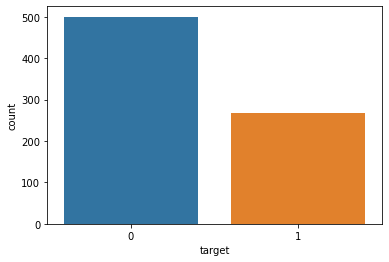

In [6]:
sns.countplot(data=df,x="target")

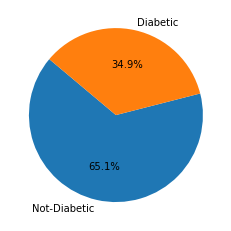

In [7]:
plt.pie(df["target"].value_counts(), labels=["Not-Diabetic","Diabetic"],autopct='%1.1f%%', startangle=140)
plt.show()

<AxesSubplot:xlabel='pregnant', ylabel='count'>

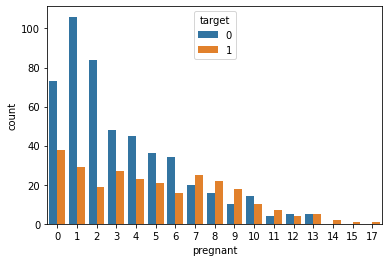

In [8]:
sns.countplot(data=df,x='pregnant',hue="target")

<AxesSubplot:>

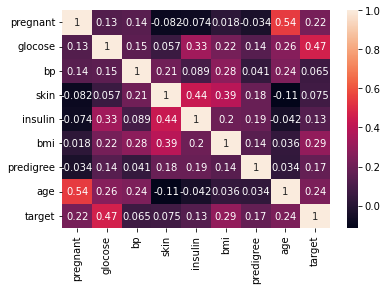

In [9]:
sns.heatmap(df.corr(), annot=True)

### Handling Missing Values 

In [10]:
df.groupby('target').mean()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age
target,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
for i in ["glocose","bp","skin","insulin","bmi"]:
 df[i].replace(0,np.nan,inplace=True)
 df[i].fillna(df[i].mean(),inplace=True)

In [13]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [14]:
x

,glocose,bp,skin,insulin,bmi,predigree,age
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: target, Length: 768, dtype: int64

### Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
X = standardized_data
Y = df['target']

### Splitiing the dataset into training and testing 

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

### Building a Logistic Regression model

In [18]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

### Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy:{ac}\n{cm}\n\n{cr}")

Accuracy:0.7864583333333334
[[107  16]
 [ 25  44]]

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       123
           1       0.73      0.64      0.68        69

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



### Bias and Variance Tradeoff

In [20]:
train=logreg.score(xtrain,ytrain)
test=logreg.score(xtest,ytest)
print(f"Training Score :{train}\nTesting Score:{test}")

Training Score :0.7708333333333334
Testing Score:0.7864583333333334


### Building KNeigbors classifier model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred1=knn.predict(xtest)

### Model Evaluation

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy:{ac}\n{cm}\n\n{cr}")

Accuracy:0.7864583333333334
[[107  16]
 [ 25  44]]

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       123
           1       0.73      0.64      0.68        69

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



In [23]:
knn_list=[]
for i in range(1,31):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(xtrain,ytrain)
 ypred=knn.predict(xtest)
 ac=accuracy_score(ytest,ypred)
 knn_list.append(ac)

In [24]:
knn_list

[0.7291666666666666,
 0.7447916666666666,
 0.734375,
 0.75,
 0.7552083333333334,
 0.7604166666666666,
 0.765625,
 0.7447916666666666,
 0.765625,
 0.7708333333333334,
 0.7447916666666666,
 0.765625,
 0.765625,
 0.7604166666666666,
 0.7916666666666666,
 0.7916666666666666,
 0.8072916666666666,
 0.796875,
 0.7916666666666666,
 0.8020833333333334,
 0.796875,
 0.7760416666666666,
 0.7708333333333334,
 0.78125,
 0.7864583333333334,
 0.7604166666666666,
 0.7708333333333334,
 0.7916666666666666,
 0.7864583333333334,
 0.7760416666666666]

In [25]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(xtrain,ytrain)
ypred2=knn.predict(xtest)


In [26]:
accuracy_score(ytest,ypred2)

0.8072916666666666

### Building a Support Vector Classifier model (SVC)

In [28]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain,ytrain)

SVC()

In [29]:
train = svm.score(xtrain,ytrain)
test = svm.score(xtest,ytest)
print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

Training Accuracy:- 0.7672253258845437
 Testing Accuracy:- 0.7662337662337663


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrains = sc.fit_transform(xtrain)
xtests = sc.transform(xtest)

In [31]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrains,ytrain)

SVC()

### To check how much bias and variance model has

In [32]:
train = svm.score(xtrains,ytrain)
test = svm.score(xtests,ytest)
print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

Training Accuracy:- 0.819366852886406
 Testing Accuracy:- 0.7878787878787878


If we have high error in training and low error in testing 
high bias + low variance = Underfit model

In [34]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
ac = accuracy_score(ytest, ypred)
ra = roc_auc_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n\n{cr}")

Accuracy : 0.7792207792207793
ROC : 0.7393231265108784
[[130  16]
 [ 35  50]]

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       146
           1       0.76      0.59      0.66        85

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



## ROCAUC

### To check actual and predicted values

In [33]:
print(f"Actual Values     : {ytest[:25].values}")
print(f"Predicted Values  : {ypred[:25]}")

Actual Values     : [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicted Values  : [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]


### To improve recall and f1 score

Our goal is to shift the threshold

In [35]:
ypredprob = logreg.predict_proba(xtest)[:, 1]

In [36]:
ypredprob #probability of a patient for being diabetic i.e for class 1

array([0.40625075, 0.28077219, 0.09660638, 0.08226359, 0.27210538,
       0.33805359, 0.32924369, 0.10932587, 0.20508145, 0.27549425,
       0.37433948, 0.10343217, 0.98569267, 0.65931487, 0.34468326,
       0.65247441, 0.30359219, 0.3082597 , 0.04020466, 0.10965518,
       0.42545094, 0.11225102, 0.87207434, 0.16623794, 0.08236012,
       0.43349572, 0.2566931 , 0.60480666, 0.12305222, 0.37002902,
       0.4341836 , 0.10016338, 0.05503125, 0.81696733, 0.16492825,
       0.8062633 , 0.08274675, 0.20591625, 0.07391423, 0.51442361,
       0.27209259, 0.10680573, 0.03718714, 0.34862239, 0.08020986,
       0.01913346, 0.84706575, 0.79620724, 0.07882408, 0.12902727,
       0.04936796, 0.18340703, 0.76288859, 0.05440973, 0.66656995,
       0.11557965, 0.29140397, 0.24942856, 0.60247494, 0.17636299,
       0.6562884 , 0.07113785, 0.70771391, 0.25045313, 0.52741213,
       0.12639502, 0.50060211, 0.52766201, 0.56286389, 0.56923335,
       0.87136099, 0.84119707, 0.56617465, 0.01638863, 0.62075

### Binarize 

In [37]:
from sklearn.preprocessing import binarize
ypred = binarize([ypredprob], threshold=0.3)[0]

In [38]:
print(f"Actual Values     : {ytest[:25].values}")
print(f"Predicted Values  : {ypred[:25].astype(int)}")

Actual Values     : [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicted Values  : [1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0]


### Model Evaluation

In [39]:
ac = accuracy_score(ytest, ypred)
ra = roc_auc_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n\n{cr}")

Accuracy : 0.7532467532467533
ROC : 0.7679290894439967
[[104  42]
 [ 15  70]]

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       146
           1       0.62      0.82      0.71        85

    accuracy                           0.75       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.78      0.75      0.76       231



### Bias and Variance tradeoff

In [40]:
train = logreg.score(xtrain, ytrain)
test = logreg.score(xtest, ytest)

print(f"Training Accuracy - : {train}\nTesting Accuracy -: {test}")

Training Accuracy - : 0.7672253258845437
Testing Accuracy -: 0.7792207792207793


### Plot ROC Curve

In [41]:
from sklearn.metrics import roc_curve

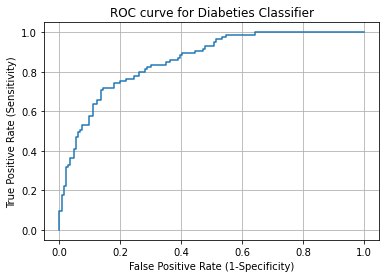

In [42]:
fpr, tpr, thres = roc_curve(ytest, ypredprob)
plt.plot(fpr, tpr)

plt.title("ROC curve for Diabeties Classifier")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid()
plt.show()  